# 1. Install dependecies

In [13]:
# !pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [14]:
# !pip list

# 2. Setup imports and configuring the GPU

In [15]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

import os, shutil, pathlib
!rm -rf /content/logs

In [16]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

tf.config.list_physical_devices('GPU')


[]

# 3. Setup directories and cleaning data of our dataset

In [17]:
# Setup the directory of training, test and validation data
data_dir_train = "/kaggle/input/vegetable-image-dataset/Vegetable Images/train"
data_dir_validation = "/kaggle/input/vegetable-image-dataset/Vegetable Images/validation"
data_dir_test = "/kaggle/input/vegetable-image-dataset/Vegetable Images/test"

# Managing the extension of the files
image_exts = ['jpeg','jpg', 'bmp', 'png']



# 4. Load the data

In [18]:
# Specify inage dimensions
IMAGE_SHAPE = (150, 150)

# Load data
datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)
train_generator = datagen.flow_from_directory(
    data_dir_train,
    shuffle=True,
    target_size=IMAGE_SHAPE,
    batch_size=32,
    class_mode='categorical'
)
valid_generator = datagen.flow_from_directory(
    data_dir_validation,
    shuffle=False,
    target_size=IMAGE_SHAPE,
    batch_size=32,
    class_mode='categorical'
)
test_generator = datagen.flow_from_directory(
    data_dir_test,
    shuffle=True,
    target_size=IMAGE_SHAPE,
    batch_size=32,
    class_mode='categorical'
)

# Check names and number of classes
names_of_classes = sorted(os.listdir(data_dir_test))
print(f"\nNames of Classes : {names_of_classes}".format(names_of_classes))
number_of_classes = len(names_of_classes)

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.

Names of Classes : ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']


In [19]:
# Check number of images in each subfolder for each class

def count_files_in_subfolder(subfolder):
    
    for path in pathlib.Path(subfolder).iterdir():
        if path.is_dir():
            print("Class " + str(path.name) + ": " + \
                  str(len([name for name in os.listdir(path) \
            if os.path.isfile(os.path.join(path, name))])) + " files")

print("Train data:")
count_files_in_subfolder(os.path.join(data_dir_train))
print("\nTest data:")
count_files_in_subfolder(os.path.join(data_dir_test))
print("\nValidation data:")
count_files_in_subfolder(os.path.join(data_dir_validation))

Train data:
Class Broccoli: 1000 files
Class Capsicum: 1000 files
Class Bottle_Gourd: 1000 files
Class Radish: 1000 files
Class Tomato: 1000 files
Class Brinjal: 1000 files
Class Pumpkin: 1000 files
Class Carrot: 1000 files
Class Papaya: 1000 files
Class Cabbage: 1000 files
Class Bitter_Gourd: 1000 files
Class Cauliflower: 1000 files
Class Bean: 1000 files
Class Cucumber: 1000 files
Class Potato: 1000 files

Test data:
Class Broccoli: 200 files
Class Capsicum: 200 files
Class Bottle_Gourd: 200 files
Class Radish: 200 files
Class Tomato: 200 files
Class Brinjal: 200 files
Class Pumpkin: 200 files
Class Carrot: 200 files
Class Papaya: 200 files
Class Cabbage: 200 files
Class Bitter_Gourd: 200 files
Class Cauliflower: 200 files
Class Bean: 200 files
Class Cucumber: 200 files
Class Potato: 200 files

Validation data:
Class Broccoli: 200 files
Class Capsicum: 200 files
Class Bottle_Gourd: 200 files
Class Radish: 200 files
Class Tomato: 200 files
Class Brinjal: 200 files
Class Pumpkin: 200 f

# 4. Prepare data for training and evaluation

# 5. Deep Learning model

In [20]:
model = Sequential() # model object

# Add Layers
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))

# Flatten the feature map
model.add(Flatten())
# Add the fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(15, activation='softmax'))

# print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [21]:
# Compile and fit the model
early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')

hist = model.fit(train_generator, 
                 epochs=10, 
                 verbose=1, 
                 validation_data=valid_generator, 
                 steps_per_epoch = 15000//32, 
                 validation_steps = 3000//32, 
                 callbacks=early_stopping)

Epoch 1/10
468/468 [==============================] - 390s 829ms/step - loss: 1.2728 - accuracy: 0.5815 - val_loss: 0.5506 - val_accuracy: 0.8340
Epoch 2/10
468/468 [==============================] - 381s 814ms/step - loss: 0.2806 - accuracy: 0.9106 - val_loss: 0.2385 - val_accuracy: 0.9325
Epoch 4/10
468/468 [==============================] - 378s 809ms/step - loss: 0.1853 - accuracy: 0.9403 - val_loss: 0.1995 - val_accuracy: 0.9489
Epoch 5/10
468/468 [==============================] - 380s 812ms/step - loss: 0.1386 - accuracy: 0.9558 - val_loss: 0.2144 - val_accuracy: 0.9432
Epoch 6/10
468/468 [==============================] - 378s 808ms/step - loss: 0.1278 - accuracy: 0.9601 - val_loss: 0.2355 - val_accuracy: 0.9372
Epoch 7/10
468/468 [==============================] - 374s 798ms/step - loss: 0.1075 - accuracy: 0.9660 - val_loss: 0.2637 - val_accuracy: 0.9422
Epoch 8/10
468/468 [==============================] - 377s 805ms/step - loss: 0.0942 - accuracy: 0.9704 - val_loss: 0.2269 -

# 6. Plotting the error and accuracy

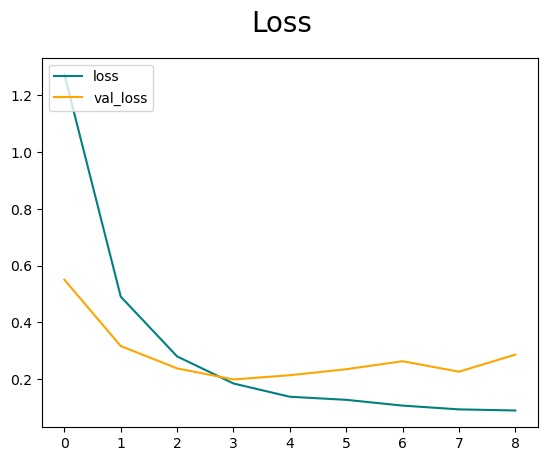

In [22]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

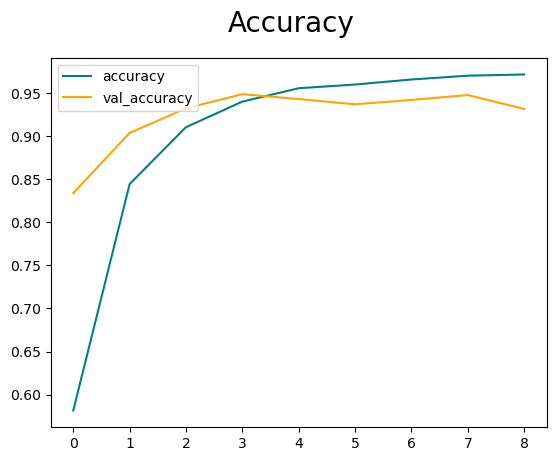

In [23]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 7. Evaluate

In [25]:
model.evaluate(test_generator)

94/94 [==============================] - 34s 357ms/step - loss: 0.2504 - accuracy: 0.9303


[0.25039151310920715, 0.9303333163261414]

1/1 [==============================] - 0s 34ms/step


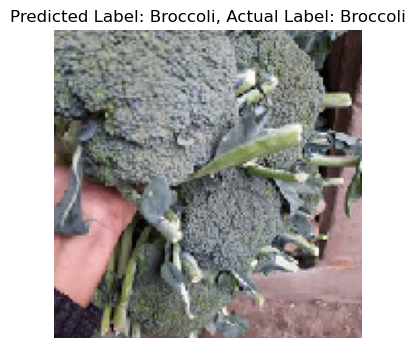

In [35]:
# Testing the 
test_image_path = r'/kaggle/input/vegetable-image-dataset/Vegetable Images/test/Broccoli/1001.jpg'

def generate_predictions(test_image_path, actual_label):
    
    # 1. Load and preprocess the image
    test_img = image.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # 2. Make Predictions
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = names_of_classes[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()

# call the function
generate_predictions(test_image_path, actual_label='Broccoli')

# 7. Save model

In [33]:
model.save('Veg1.h5')